# Plots (in R)

## Setup

In [2]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(RColorBrewer)
library(stringr)
library(patchwork)
library(ggforce)
library(svglite)
library(extrafont)

## Pipeline

In [3]:
df = read.csv(file = "../data/pipeline_sample/pipeline.csv")

In [28]:
df

In.,Tree.,X1,X2,X3,X4,X5,X6,X7,X8,⋯,X15,X16,X17,X18,X19,X20,X21,id,label,short_label
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,1,aCAM1,aCAM1,aCAM1,aCAM1,aCAM2,aCAM2,aCAM2,aCAM2,⋯,,,,,,,,0,1 tree/core,(d)
2,1,,,,,aCAM1,aCAM1,aCAM1,aCAM1,⋯,SRAM,ACC,,,,,,0,1 tree/core,(d)
1,1,aCAM1,aCAM1,aCAM1,aCAM1,aCAM2,aCAM2,aCAM2,aCAM2,⋯,,,,,,,,1,2 trees/core,(e)
1,2,aCAM1,aCAM1,aCAM1,aCAM1,aCAM2,aCAM2,aCAM2,aCAM2,⋯,,,,,,,,1,2 trees/core,(e)
2,1,,,,,aCAM1,aCAM1,aCAM1,aCAM1,⋯,SRAM,ACC,,,,,,1,2 trees/core,(e)
2,2,,,,,aCAM1,aCAM1,aCAM1,aCAM1,⋯,MMR,SRAM,ACC,,,,,1,2 trees/core,(e)
1,1,aCAM1,aCAM1,aCAM1,aCAM1,aCAM2,aCAM2,aCAM2,aCAM2,⋯,,,,,,,,2,5 trees/core,(f)
1,2,aCAM1,aCAM1,aCAM1,aCAM1,aCAM2,aCAM2,aCAM2,aCAM2,⋯,,,,,,,,2,5 trees/core,(f)
1,3,aCAM1,aCAM1,aCAM1,aCAM1,aCAM2,aCAM2,aCAM2,aCAM2,⋯,,,,,,,,2,5 trees/core,(f)


In [23]:
plot_df = df %>%
    pivot_longer(cols = starts_with("X"),
                 names_to = "time_instant",
                 values_to = "event") %>%
    mutate(line_id = paste("I:", In., ",T:", Tree., sep = ""),
           time_instant = as.numeric(gsub("X", "", time_instant))) %>%
    mutate(line_id = as.factor(line_id),
           full_label = paste(short_label, label, sep = " "))


plot_df[plot_df$event == "", "event"] = NA

plot_df = plot_df %>%
    mutate(event = factor(event, levels = c("aCAM1", "aCAM2", "aCAM3", "BUF", "ACC", "MMR", "SRAM", NA)))


In [24]:
levels(plot_df$event)

[1] "aCAM1" "aCAM2" "aCAM3" "BUF"   "ACC"   "MMR"   "SRAM"

In [25]:
str(plot_df)

tibble [336 × 9] (S3: tbl_df/tbl/data.frame)
 $ In.         : int [1:336] 1 1 1 1 1 1 1 1 1 1 ...
 $ Tree.       : int [1:336] 1 1 1 1 1 1 1 1 1 1 ...
 $ id          : int [1:336] 0 0 0 0 0 0 0 0 0 0 ...
 $ label       : chr [1:336] "1 tree/core" "1 tree/core" "1 tree/core" "1 tree/core" ...
 $ short_label : chr [1:336] "(d)" "(d)" "(d)" "(d)" ...
 $ time_instant: num [1:336] 1 2 3 4 5 6 7 8 9 10 ...
 $ event       : Factor w/ 7 levels "aCAM1","aCAM2",..: 1 1 1 1 2 2 2 2 4 6 ...
 $ line_id     : Factor w/ 10 levels "I:1,T:1","I:1,T:2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ full_label  : chr [1:336] "(d) 1 tree/core" "(d) 1 tree/core" "(d) 1 tree/core" "(d) 1 tree/core" ...


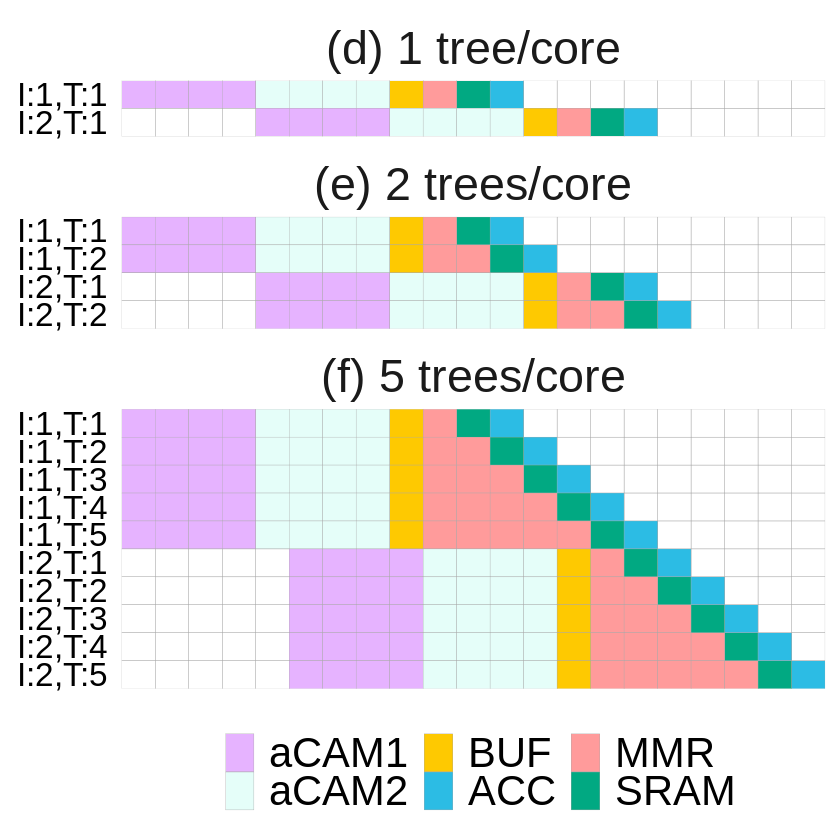

In [31]:
event_colors = c('#E6B3FF','#E5FEF9','#FEC901','#2CBCE4','#FF9B9B','#01A982', '#FFFFFF')

larger_font_size = 20

ggplot() +
    geom_tile(data = plot_df,
              aes(x = time_instant,
                  y = line_id,
                  fill = event),
              color = "darkgray") +
    scale_y_discrete(limits = rev, expand = c(0, 0)) +
    scale_x_discrete(expand = c(0, 0)) +
    scale_fill_manual(values = event_colors, na.translate = FALSE) +
    facet_col(vars(full_label), scales = "free", space = "free") +
    theme_minimal(base_size = 18) +
    theme(text = element_text(family = "Helvetica", color = "black"),
          legend.position = "bottom",
          axis.text.y = element_text(size = larger_font_size, color = "black"),
          strip.text.x = element_text(size = larger_font_size + 8, angle = 0),
          axis.ticks = element_blank(),
          legend.title = element_blank(),
          legend.text = element_text(size = larger_font_size + 5, color = "black"),
          axis.title.x = element_blank(),
          panel.grid = element_blank(),
          axis.title.y = element_blank()) +
    guides(fill = guide_legend(nrow = 2))

ggsave(filename = "../data/pipeline_sample/pipeline.svg", width = 8, height = 8, dpi = 300)
ggsave(filename = "../data/pipeline_sample/pipeline.pdf", width = 8, height = 8, dpi = 300)